In [1]:
import diff_classifier.aws as aws
import diff_classifier.utils as ut
import diff_classifier.msd as msd
import diff_classifier.features as ft
import os
import os.path as op
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.interpolate as interpolate

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
remote_folder = "01_18_Experiment/P1"
local_folder = os.getcwd()
ires = 512
prefix = 'P1_S1_L_0012'
frames = 651

In [ ]:
counter = 0
for row in range(0, 4):
    for col in range(0, 4):
        filename = "Traj_{}_{}_{}.csv".format(prefix, row, col)
        to_download = op.join(remote_folder, filename)
        local_name = op.join(local_folder, filename)
        aws.download_s3(to_download, local_name)

        if counter == 0:
            merged = msd.all_msds2(ut.csv_to_pd(local_name), frames=frames)
        else: 
            to_add = ut.csv_to_pd(local_name)
            to_add['X'] = to_add['X'] + ires*row
            to_add['Y'] = to_add['Y'] + ires*col
            to_add['Track_ID'] = to_add['Track_ID'] + max(merged['Track_ID'])
            merged = merged.append(msd.all_msds2(to_add, frames=frames))
        counter = counter + 1

In [ ]:
merged.to_csv('msd_{}.csv'.format(prefix))
merged_ft = ft.calculate_features(merged)
merged_ft.to_csv('features_{}.csv'.format(prefix))

In [ ]:
track = ft.unmask_track(merged[merged['Track_ID']==40])
ft.alpha_calc(track)

In [4]:
merged_ft = pd.read_csv('features_{}.csv'.format(prefix))

In [5]:
merged_ft

,Unnamed: 0,AR,D_fit,MSD_ratio,Track_ID,X,Y,alpha,asymmetry1,asymmetry2,asymmetry3,boundedness,efficiency,elongation,fractal_dim,kurtosis,straightness,trappedness
0,0,1.709558,1.0,0.041038,0.0,166.064420,68.579837,1.0,0.668592,3.167124e-01,0.144617,0.022370,0.051748,0.415053,2.916060,2.969550,0.010444,-0.220403
1,1,1.374837,1.0,0.264078,1.0,473.024973,34.096913,1.0,0.058097,7.820230e-01,0.007509,0.012027,0.006759,0.272641,2.575756,3.061217,0.003744,-0.223578
2,2,1.045318,1.0,0.079943,2.0,324.268582,274.013078,1.0,0.051629,7.935362e-01,0.006648,0.012694,0.234245,0.043353,1.832174,2.119789,0.050169,-0.223373
3,3,1.139210,1.0,0.029231,3.0,77.218801,354.652015,1.0,0.911347,1.523281e-01,0.315486,0.017073,0.056852,0.122199,2.846520,3.823722,0.010756,-0.222028
4,4,2.430669,1.0,0.019689,4.0,35.370376,482.819262,1.0,0.977836,7.485421e-02,0.462698,0.014169,0.059268,0.588591,2.875023,3.307489,0.010879,-0.222920
5,5,1.817072,1.0,2.555664,5.0,376.366565,137.803953,1.0,0.909021,1.544097e-01,0.312342,0.603000,0.088828,0.449664,2.078281,2.191141,0.163391,-0.054793
6,6,1.091829,1.0,1.244924,6.0,351.456582,238.069931,1.0,0.700810,2.977350e-01,0.158316,0.021117,0.002183,0.084106,1.984543,2.564908,0.005084,-0.220787
7,7,2.719949,1.0,0.029130,7.0,8.604487,439.439628,1.0,0.982772,6.591212e-02,0.484467,0.017243,0.054216,0.632346,2.959296,3.077025,0.010329,-0.221976
8,8,3.064617,1.0,0.014599,8.0,170.763954,103.124185,1.0,0.981589,6.815848e-02,0.478882,0.012328,0.078554,0.673695,2.767975,2.655743,0.012394,-0.223485
9,9,1.438506,1.0,0.069885,9.0,343.439788,486.158495,1.0,0.446610,4.459069e-01,0.076262,0.020303,0.036943,0.304834,2.921675,2.636287,0.008656,-0.221037


In [ ]:
from scipy.optimize import curve_fit

In [ ]:
y = track['MSDs']
x = track['Frame']

def msd_alpha(x, a, D):
    return 4*D*(x**a)

try:
    popt, pcov = curve_fit(msd_alpha, x, y)
    a = popt[0]
    D = popt[1]
except RuntimeError:
    print('Optimal parameters not found. Print NaN instead.')
    a = np.nan
    D = np.nan

In [ ]:
merged_ft

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbce621f90>]],
      dtype=object)

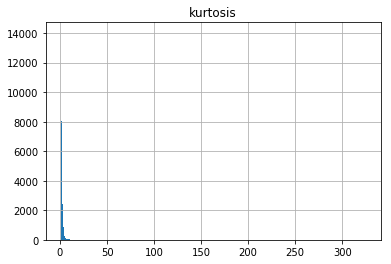

In [8]:
merged_ft.hist(column=['kurtosis'], bins=1000)

In [14]:
string = 'asymmetry1'

leveler = merged_ft[string]
t_min = 0
t_max = 1

norm = mpl.colors.Normalize(t_min, t_max, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

zs = ma.masked_invalid(merged_ft[string])
zs = ma.masked_where(zs <= t_min, zs)
zs = ma.masked_where(zs >= t_max, zs)
to_mask = ma.getmask(zs)
zs = ma.compressed(zs)
xs = ma.compressed(ma.masked_where(to_mask, merged_ft['X'].astype(int)))
ys = ma.compressed(ma.masked_where(to_mask, merged_ft['Y'].astype(int)))
#zs = np.random.rand(zs.shape[0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


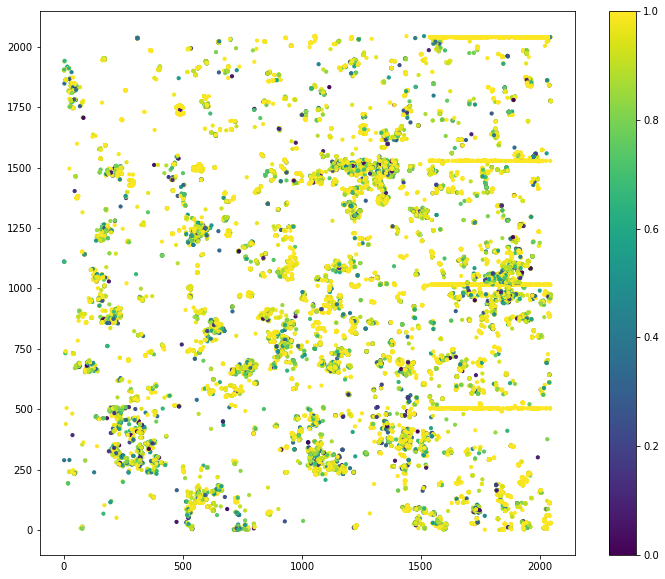

In [15]:
plt.figure(figsize=(12, 10))
plt.scatter(xs, ys, c=zs, s=10)
mapper.set_array(10)
plt.colorbar(mapper)
#plt.set_xlim(0, 4*512)
#plt.set_ylim(0, 4*512)

In [11]:
ft.kurtosis?

In [ ]:
def download_split_track_msds(prefix):
    
    import diff_classifier.aws as aws
    import diff_classifier.utils as ut
    import diff_classifier.msd as msd
    import diff_classifier.features as ft
    import diff_classifier.imagej as ij
    import os
    import os.path as op
    import numpy as np
    import numpy.ma as ma
    import pandas as pd
    import boto3
    
    #Splitting section
    ###############################################################################################
    remote_folder = "01_18_Experiment/{}".format(prefix.split('_')[0])
    local_folder = os.getcwd()
    ires = 512
    frames = 651
    filename = '{}.tif'.format(prefix)
    remote_name = op.join(remote_folder, filename)
    local_name = op.join(local_folder, filename)
    
    #local_name = op.split(filename)[1]
    #DIR = op.split(filename)[0]
    try1 = prefix + '_0_0.tif'
    try2 = prefix + '_3_3.tif'
    
    s3 = boto3.client('s3')
    try:
        obj = s3.head_object(Bucket='ccurtis7.pup', Key=op.join(remote_folder, try1))
    except:
        try:
            obj = s3.head_object(Bucket='ccurtis7.pup', Key=op.join(remote_folder, try2))
        except:
            aws.download_s3(remote_name, local_name)
            names = ij.partition_im(local_name)
            for name in names:
                aws.upload_s3(name, op.join(remote_folder, name))
    print("Done with splitting.  Should output file of name {}".format(op.join(remote_folder, name)))
    
    
    #Tracking section
    ################################################################################################
    for name in names
        outfile = 'Traj_' + name.split('.')[0] + '.csv'
        local_im = op.join(local_folder, name)
        if not op.isfile(outfile):
            ij.track(local_im, outfile, template=None, fiji_bin=None, radius=4.5, threshold=0., 
                  do_median_filtering=True, quality=4.5, median_intensity=300.0, snr=0.0, 
                  linking_max_distance=8.0, gap_closing_max_distance=10.0, max_frame_gap=2,
                  track_displacement=10.0)

            aws.upload_s3(outfile, op.join(remote_folder, outfile))
        print("Done with tracking.  Should output file of name {}".format(op.join(remote_folder, outfile)))
    
    
    #MSD and features section
    #################################################################################################
    counter = 0
    for name in names
        row = int(name.split('.')[0].split('_')[4])
        col = int(name.split('.')[0].split('_')[5])
        
        filename = "Traj_{}_{}_{}.csv".format(prefix, row, col)
        local_name = op.join(local_folder, filename)

        if counter == 0:
            merged = msd.all_msds2(ut.csv_to_pd(local_name), frames=frames)
        else: 
            to_add = ut.csv_to_pd(local_name)
            to_add['X'] = to_add['X'] + ires*row
            to_add['Y'] = to_add['Y'] + ires*col
            to_add['Track_ID'] = to_add['Track_ID'] + max(merged['Track_ID'])
            merged = merged.append(msd.all_msds2(to_add, frames=frames))
        counter = counter + 1
        
        msd_file = 'msd_{}.csv'.format(prefix)
        merged.to_csv(msd_file)
        aws.upload_s3(msd_file, op.join(remote_folder, msd_file))
        merged_ft = ft.calculate_features(merged)
        ft_file = 'features_{}.csv'.format(prefix)
        merged_ft.to_csv(ft_file)
        aws.upload_s3(ft_file, op.join(remote_folder, ft_file))

In [ ]:
test = !ls Traj*

In [ ]:
'P1_S1_L_0012'.split('_')[0]

In [ ]:
files = !ls Traj*
local_name = files[0]

In [ ]:
test = msd.all_msds2(ut.csv_to_pd(local_name))

In [ ]:
ft.unmask_track(test[test['Track_ID']==50]).shape[0]